# IO

In [1]:
import PineBioML.IO as IO

In [2]:
# example_PipeLine.py ./input/ example_data.xlsx 0 y

data = IO.read_file("./input/HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

# Train test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Data Overview

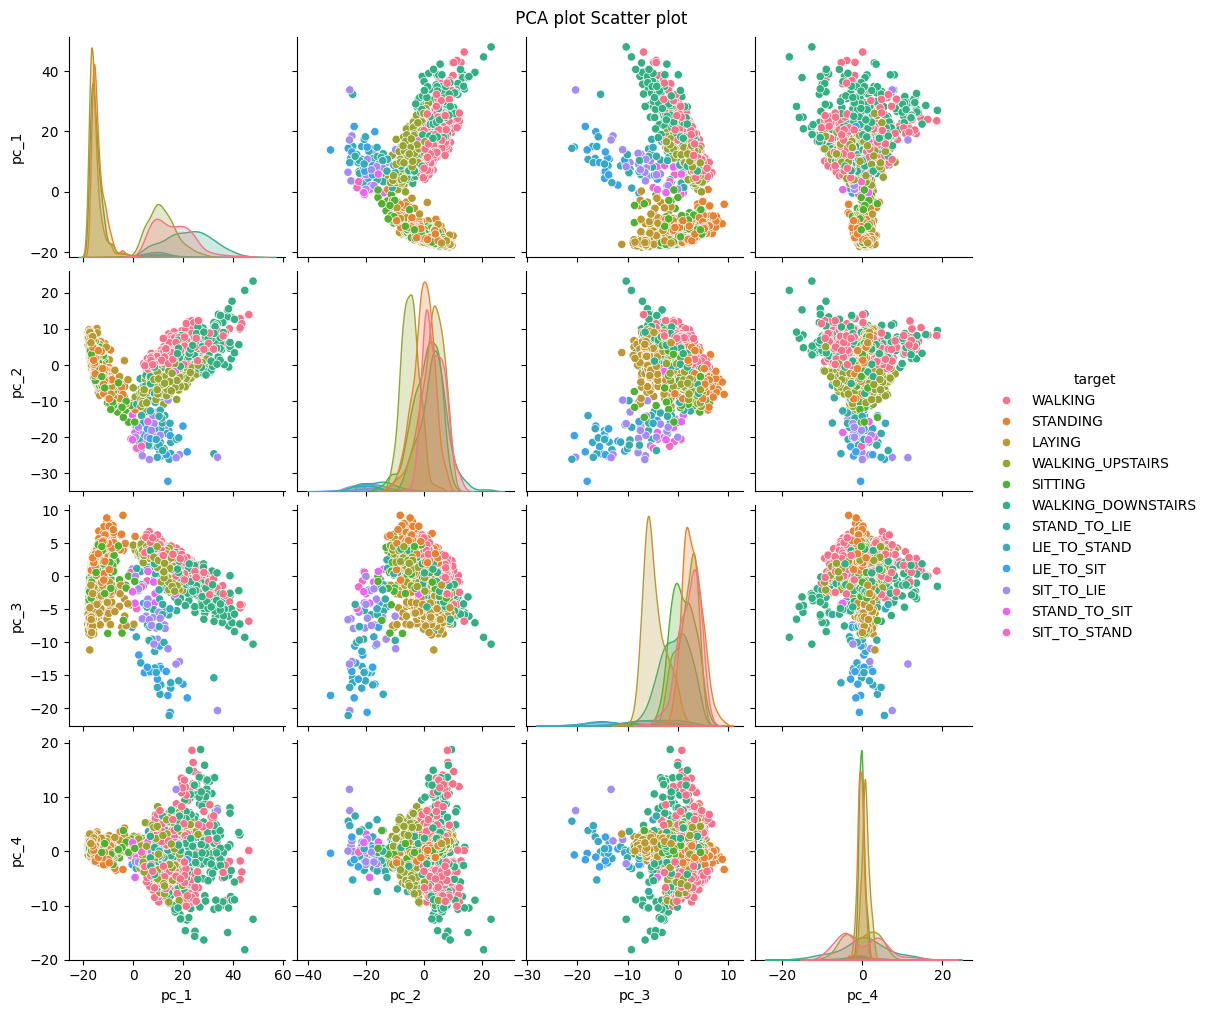

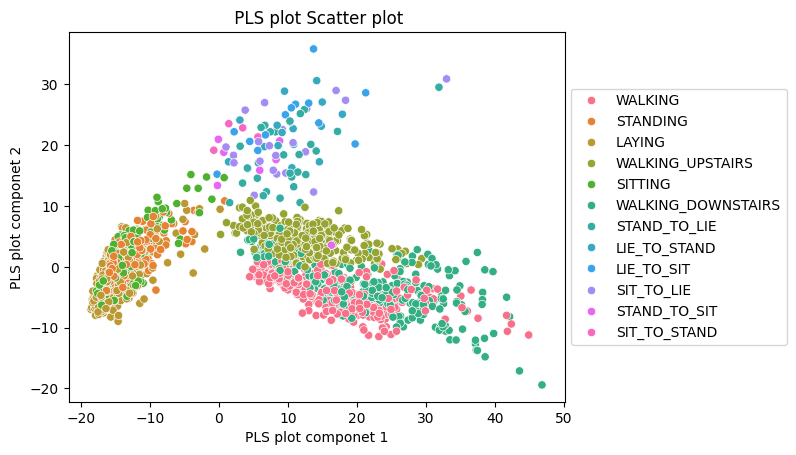

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


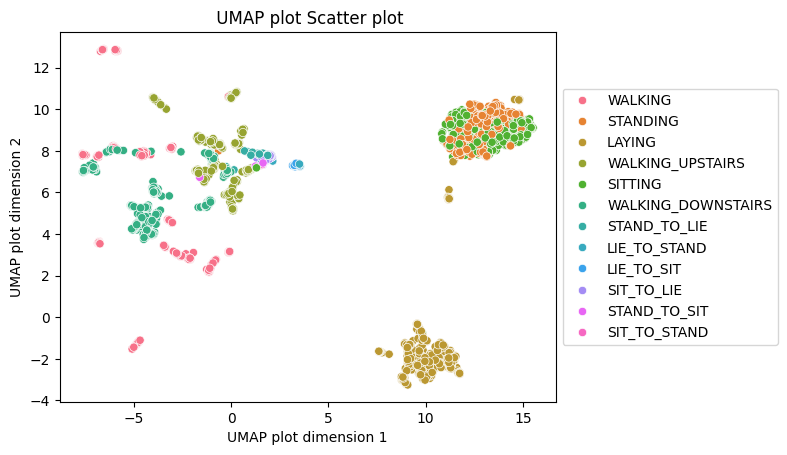

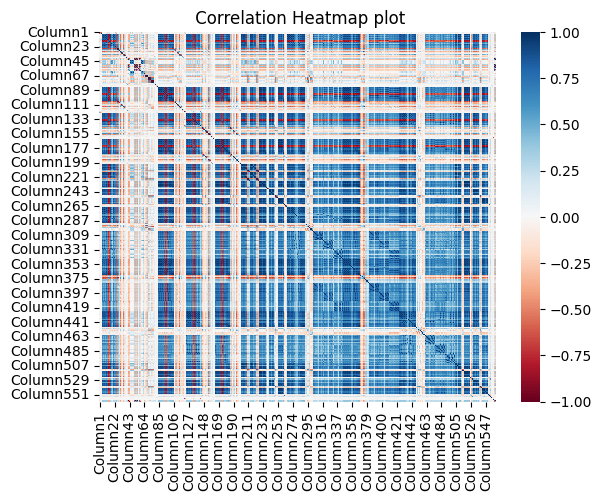

In [4]:
from PineBioML.report.utils import data_overview
data_overview(x_train, y_train, show_fig = True)

# Modeling

In [5]:
from PineBioML.preprocessing import Normalizer
from PineBioML.preprocessing import impute
from PineBioML.selection.classification import ensemble_selector
import PineBioML.model.supervised.Classification as tuner
from sklearn.pipeline import Pipeline

In [6]:
pipe = Pipeline(
    [
        ("Standarization", Normalizer(method="StandardScaler")),
        ("Missing_Value_Processing", impute.simple_imputer(threshold = 0.6, strategy = "constant")),
        ("Feature_Selection", ensemble_selector(z_importance_threshold = 1)),
        ("Modeling", tuner.RandomForest_tuner(target="f1_macro"))
     ]
)

In [7]:
pipe.fit(x_train, y_train)

Using  c45  to score.


100%|██████████| 561/561 [00:00<00:00, 3216.49it/s]


c45  is done. Using 6.7467

Using  RF_gini  to score.
RF_gini  is done. Using 13.3349

Using  Lasso  to score.
Lasso  is done. Using 3.1705

Using  multi_Lasso  to score.
multi_Lasso  is done. Using 8.1619

Using  SVM  to score.
SVM  is done. Using 163.5747

optuna seed 7770  |  validation seed 5562  |  model seed 11558
    RandomForest start tuning. it will take a while.


c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


    optuna is better, best trial:  45


Pipeline(steps=[('Standarization',
                 <PineBioML.preprocessing.Normalizer object at 0x000001EA8CDD07D0>),
                ('Missing_Value_Processing',
                 <PineBioML.preprocessing.impute.simple_imputer object at 0x000001EA8EBBEF50>),
                ('Feature_Selection',
                 <PineBioML.selection.classification.ensemble_selector object at 0x000001EA8CE056D0>),
                ('Modeling',
                 <PineBioML.model.supervised.Classification.RandomForest_tuner object at 0x000001EA8EA81350>)])

# Evaluation

In [8]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, pipe.predict_proba(x_valid), show_fig=False)

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


                   precision    recall  f1-score support
LAYING                   1.0  0.994413  0.997199   179.0
LIE_TO_SIT          0.357143  0.454545       0.4    11.0
LIE_TO_STAND        0.454545  0.416667  0.434783    12.0
SITTING             0.879518  0.966887  0.921136   151.0
SIT_TO_LIE          0.727273       0.8  0.761905    10.0
SIT_TO_STAND             1.0  0.666667       0.8     6.0
STANDING             0.97006  0.885246  0.925714   183.0
STAND_TO_LIE        0.538462  0.736842  0.622222    19.0
STAND_TO_SIT        0.833333  0.333333   0.47619    15.0
WALKING             0.966102  0.994186  0.979943   172.0
WALKING_DOWNSTAIRS  0.975806  0.945312  0.960317   128.0
WALKING_UPSTAIRS     0.96875  0.981013  0.974843   158.0
                                                        
macro avg           0.805916  0.764593  0.771188  1044.0
weighted avg        0.937596   0.93295  0.932465  1044.0
accuracy                                 0.93295  1044.0


<Figure size 640x480 with 0 Axes>

# Saving Model

In [9]:
# save model
IO.save_model(pipe, "./output/models/", "MostInOne", overide=True)

# Reload model

In [10]:
# load model
presaved_model = IO.load_model("./output/models/MostInOne")

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


                   precision    recall  f1-score support
LAYING                   1.0  0.994413  0.997199   179.0
LIE_TO_SIT          0.357143  0.454545       0.4    11.0
LIE_TO_STAND        0.454545  0.416667  0.434783    12.0
SITTING             0.879518  0.966887  0.921136   151.0
SIT_TO_LIE          0.727273       0.8  0.761905    10.0
SIT_TO_STAND             1.0  0.666667       0.8     6.0
STANDING             0.97006  0.885246  0.925714   183.0
STAND_TO_LIE        0.538462  0.736842  0.622222    19.0
STAND_TO_SIT        0.833333  0.333333   0.47619    15.0
WALKING             0.966102  0.994186  0.979943   172.0
WALKING_DOWNSTAIRS  0.975806  0.945312  0.960317   128.0
WALKING_UPSTAIRS     0.96875  0.981013  0.974843   158.0
                                                        
macro avg           0.805916  0.764593  0.771188  1044.0
weighted avg        0.937596   0.93295  0.932465  1044.0
accuracy                                 0.93295  1044.0


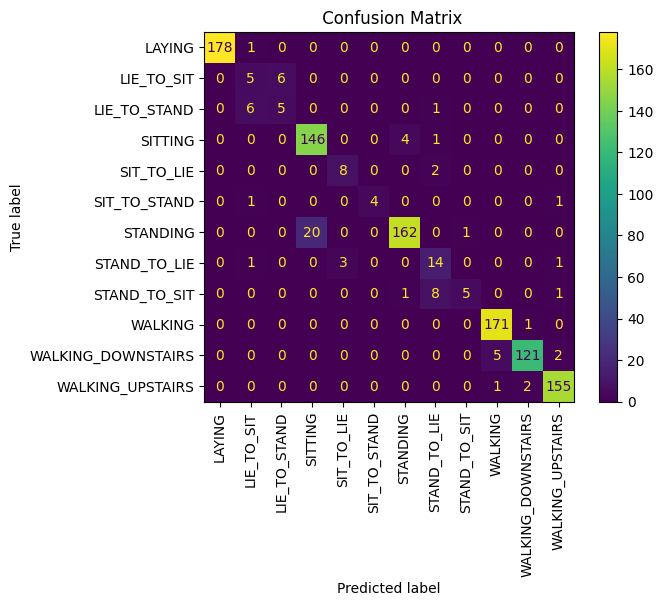

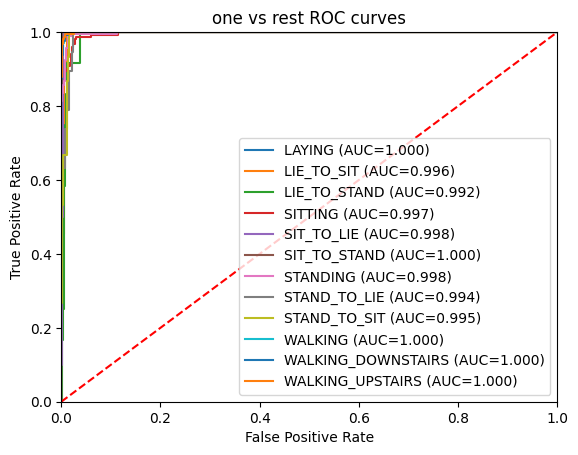

In [11]:
classification_summary(y_valid, presaved_model.predict_proba(x_valid)) 